Visualizing our Data with Features

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('full_dataset.csv')

In [8]:
df.head(5)

,Unnamed: 0,text,platform,positive_words,negative_words,length,word_count,male_words,female_words,afinn
0,0,Had a good first days WE at the herald,twitter,1,0,39,9,0,0,3.0
1,1,whaat. making sure.. she's safe.,twitter,0,0,34,5,0,0,1.0
2,2,"HAHAHAHAHAHA, Se ferrou!",twitter,0,0,26,3,0,0,0.0
3,3,Cant sleep with bad thoughts in my mind,twitter,0,1,40,8,0,0,-3.0
4,4,"so tired and sick of trains, tho getting on an...",twitter,0,2,57,11,0,0,-4.0


In [9]:
df.platform.unique()

array(['twitter', 'instagram', 'reddit', 'youtube'], dtype=object)

## Emotion Detection

The excessive use of positive and negative words might indicate that the users like to express their emotions.

Let's see how users express their emotions in different platforms!

Here is a feature we can use to measure emotion density: $$ED:= \text{emotion density} = \frac{\text{positive words}+\text{negative words}}{\text{word count}}$$

In [10]:
df['ED'] = (df['positive_words']+df['negative_words'])/df['word_count']

In [11]:
df

,Unnamed: 0,text,platform,positive_words,negative_words,length,word_count,male_words,female_words,afinn,ED
0,0,Had a good first days WE at the herald,twitter,1,0,39,9,0,0,3.0,0.111111
1,1,whaat. making sure.. she's safe.,twitter,0,0,34,5,0,0,1.0,0.000000
2,2,"HAHAHAHAHAHA, Se ferrou!",twitter,0,0,26,3,0,0,0.0,0.000000
3,3,Cant sleep with bad thoughts in my mind,twitter,0,1,40,8,0,0,-3.0,0.125000
4,4,"so tired and sick of trains, tho getting on an...",twitter,0,2,57,11,0,0,-4.0,0.181818
...,...,...,...,...,...,...,...,...,...,...,...
587253,587253,Best contestant ever,youtube,1,0,20,3,0,0,3.0,0.333333
587254,587254,9:16 is gold,youtube,1,0,12,3,0,0,2.0,0.333333
587255,587255,"Wait, did she said her cat came back from the ...",youtube,0,0,105,19,0,2,-2.0,0.000000
587256,587256,Ok we all have to admit it. Aubrey turns us on...,youtube,0,0,93,20,0,2,4.0,0.000000


In [36]:
df_twitter = df[df['platform']=='twitter']
df_reddit = df[df['platform']=='reddit']
df_instagram = df[df['platform']=='instagram']
df_youtube = df[df['platform']=='youtube']



In [40]:
df_youtube

,Unnamed: 0,text,platform,positive_words,negative_words,length,word_count,male_words,female_words,afinn,ED
575954,575954,Waoo,youtube,0,0,4,1,0,0,0.0,0.000000
575955,575955,Awesome art work 👌👌😍😍,youtube,2,0,21,4,0,0,4.0,0.500000
575956,575956,"Great artwork, lovely video. Thank you for sha...",youtube,4,0,63,11,0,0,11.0,0.363636
575957,575957,Nice drawing 👌,youtube,1,0,14,3,0,0,3.0,0.333333
575958,575958,Beautiful drawing,youtube,1,0,17,2,0,0,3.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...
587253,587253,Best contestant ever,youtube,1,0,20,3,0,0,3.0,0.333333
587254,587254,9:16 is gold,youtube,1,0,12,3,0,0,2.0,0.333333
587255,587255,"Wait, did she said her cat came back from the ...",youtube,0,0,105,19,0,2,-2.0,0.000000
587256,587256,Ok we all have to admit it. Aubrey turns us on...,youtube,0,0,93,20,0,2,4.0,0.000000


array([[<Axes: title={'center': 'ED'}>]], dtype=object)

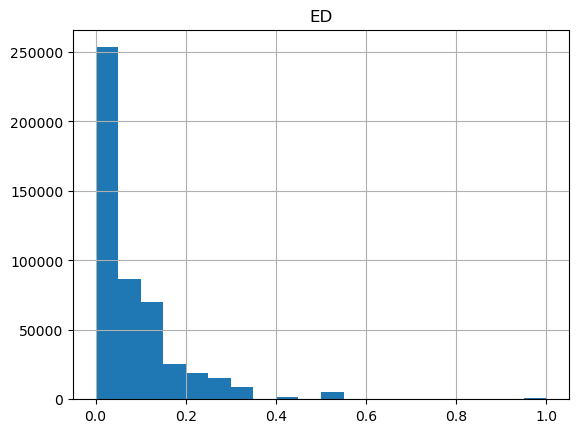

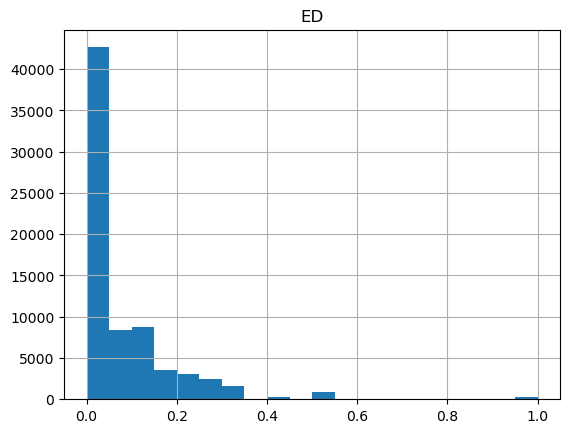

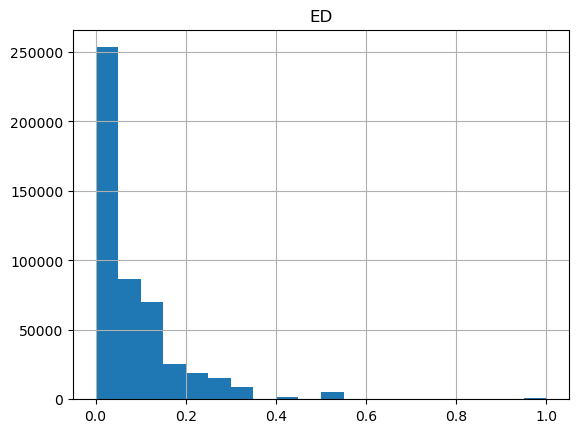

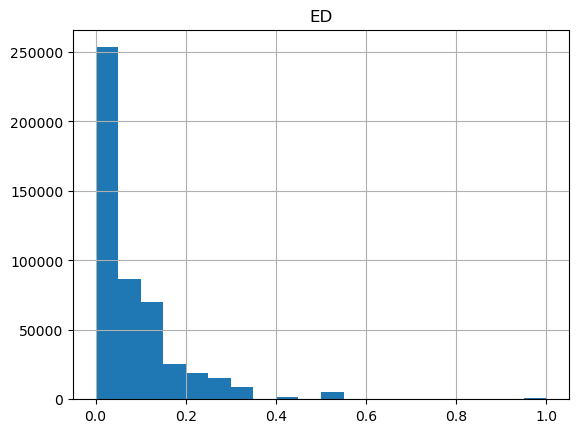

In [45]:
df_twitter.hist(column='ED', bins = 20)
df_reddit.hist(column='ED', bins = 20)
df_instagram.hist(column='ED', bins = 20)
df_youtube.hist(column='ED', bins = 20)

Let's take a look at the histograms without emotionless posts!

array([[<Axes: title={'center': 'ED'}>]], dtype=object)

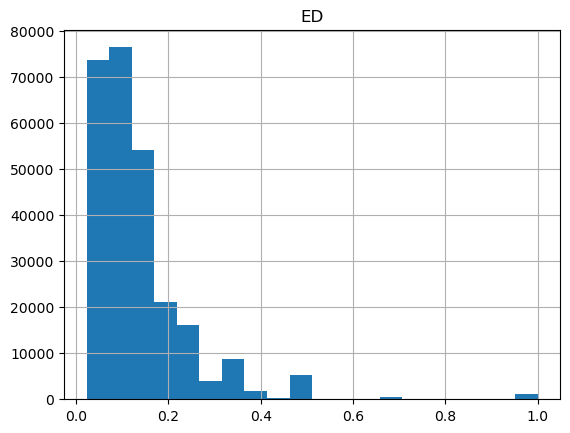

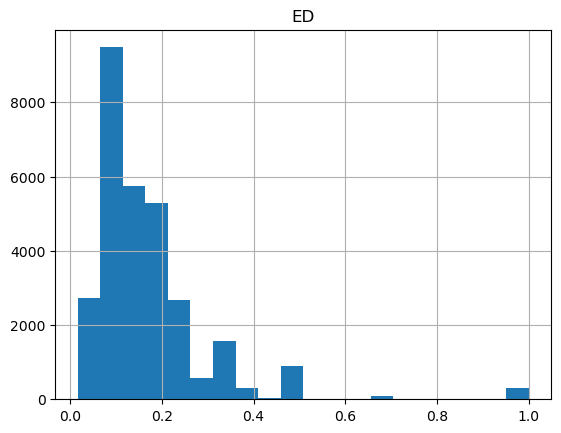

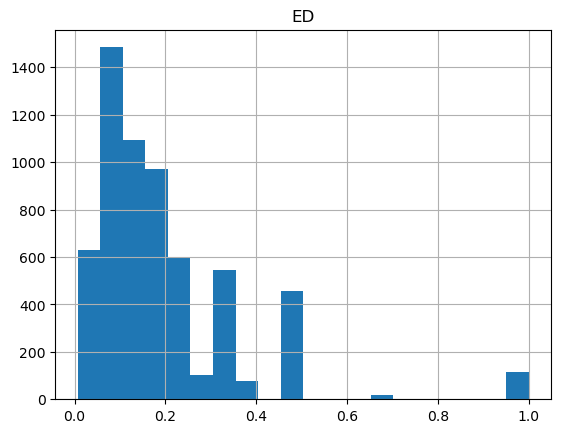

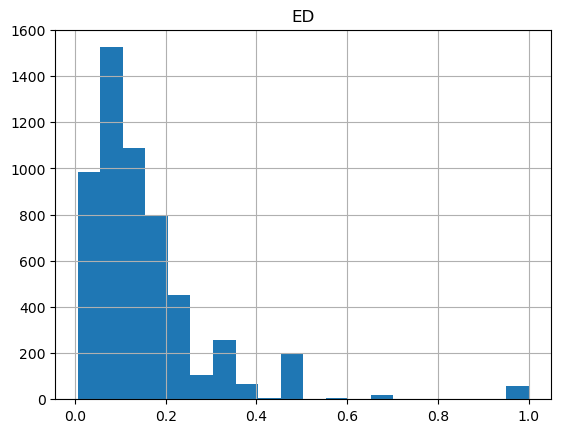

In [46]:
df_twitter[df_twitter['ED']>0].hist(column='ED', bins = 20)
df_reddit[df_reddit['ED']>0].hist(column='ED', bins = 20)
df_instagram[df_instagram['ED']>0].hist(column='ED', bins = 20)
df_youtube[df_youtube['ED']>0].hist(column='ED', bins = 20)

All the histograms seem very similar except at the value close to 0!!

Let's analyze more quantitatively! Let's look at the ratio of emotionless texts.

In [47]:
emotionless_twitter = len(df_twitter[df_twitter['ED'] == 0]) / len(df_twitter)

In [48]:
emotionless_twitter

0.46109630515786604

In [49]:
emotionless_reddit = len(df_reddit[df_reddit['ED'] == 0]) / len(df_reddit)

In [50]:
emotionless_reddit

0.5880640465793304

In [51]:
emotionless_instagram = len(df_instagram[df_instagram['ED'] == 0]) / len(df_instagram)

In [53]:
emotionless_instagram

0.5713007922310248

In [54]:
emotionless_youtube = len(df_youtube[df_youtube['ED'] == 0]) / len(df_youtube)

In [55]:
emotionless_youtube

0.5078733191790517

Here now we see some difference in different platforms. 

It seems that the most emotionless platform is reddit, where ~59% of the posts are emotionless. 

On the other hand, twitter users have the least emotionless posts ~46%.

We could also analyze the distributions of positive and negative emotions across different platforms

In [60]:
pos1_twitter = len(df_twitter[df_twitter['positive_words'] != 0]) / len(df_twitter[df_twitter['ED'] != 0])
pos1_reddit = len(df_reddit[df_reddit['positive_words'] != 0]) / len(df_reddit[df_reddit['ED'] != 0])
pos1_instagram = len(df_instagram[df_instagram['positive_words'] != 0]) / len(df_instagram[df_instagram['ED'] != 0])
pos1_youtube = len(df_youtube[df_youtube['positive_words'] != 0]) / len(df_youtube[df_youtube['ED'] != 0])

In [61]:
print(pos1_twitter, pos1_reddit,pos1_instagram,pos1_youtube)

0.6515100256580822 0.7188625273430927 0.7575260804769002 0.7384504763616754


In [62]:
neg1_twitter = len(df_twitter[df_twitter['negative_words'] != 0]) / len(df_twitter[df_twitter['ED'] != 0])
neg1_reddit = len(df_reddit[df_reddit['negative_words'] != 0]) / len(df_reddit[df_reddit['ED'] != 0])
neg1_instagram = len(df_instagram[df_instagram['negative_words'] != 0]) / len(df_instagram[df_instagram['ED'] != 0])
neg1_youtube = len(df_youtube[df_youtube['negative_words'] != 0]) / len(df_youtube[df_youtube['ED'] != 0])

In [63]:
print(neg1_twitter, neg1_reddit,neg1_instagram,neg1_youtube)

0.5141727644207925 0.3963318189466599 0.27034277198211626 0.47528312061837136


Again, we see a different trend in twitter posts. Among the twitter posts that showed some emotion, ~65% of them shows positive emotions and ~51 of them shows negative emotions.

It seems on the other platforms, people tend to express positive emotions more than negative ones (~73% vs ~40%). On the other hand, twitter seems more balanced in terms of negative vs positive emotions.

Let's now look at a different feature: relative positiveness and rel. negativeness. To be precise:
$$\text{rel pos} = \max(0, (\text{positive words} - \text{negative words}))$$